In [1]:
import pandas as pd
import os
import datetime
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Bigger than normal fonts
sns.set(font_scale=1.2)

# matplotlib 한글폰트 표시
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 불필요한 pandas warning 제거
pd.options.mode.chained_assignment = None

# 엑셀 날짜가 정수형으로 들어온 경우 datetime으로 변환
def xldate_to_datetime(xldate):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(days=xldate-2)
    
    return temp+delta

In [2]:
# k200 data 가져오기

k200_path = 'data/K200'
k200_ind_names = ['전체', '중공업', '산업재', '생활소비재', '철강소재', '정보기술', 
                  '에너지화학', '건강관리', '금융', '건설', '경기소비재']

k200_files = ['k200'+name+'.xlsx' for name in k200_ind_names]
print(k200_files)

def read_k200_data(file_name):
    
    df = pd.read_excel(os.path.join('data/K200', file_name))
    
    df1 = df.iloc[:, [0, 10, 11, 12, 1, 5]]
    df1.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    
    if df1['Date'].dtype == int:
        df1['Date'] = df1['Date'].apply(lambda x: xldate_to_datetime(x))
    
    
    return df1


df_list = []

for file_name, ind_name in zip(k200_files, k200_ind_names):
    
    df = read_k200_data(file_name)
    df = df[df['Date'] >= '2014-01-01']

    df = df.sort_values('Date')
    
    # 전일 종가 대비 종가 상승률
    df['Change_Close'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
    # 전일 종가 대비 시가 상승률
    df['Change_Open'] = (df['Open'] - df['Close'].shift(1)) / df['Close'].shift(1)
    
    # 컬럼명 앞에 산업명 달아주기
    df.columns = list(df.columns[0:1]) + [ind_name+'_'+col for col in df.columns[1:]]
    
    df_list.append(df)

    
# 전체 데이터셋 merge
df_all_dates = pd.concat(df_list, axis=0)[['Date']].drop_duplicates()
df_k200 = reduce(lambda left,right: pd.merge(left,right,on='Date', how='left'), [df_all_dates] + df_list) 
df_k200 = df_k200.sort_values('Date')

['k200전체.xlsx', 'k200중공업.xlsx', 'k200산업재.xlsx', 'k200생활소비재.xlsx', 'k200철강소재.xlsx', 'k200정보기술.xlsx', 'k200에너지화학.xlsx', 'k200건강관리.xlsx', 'k200금융.xlsx', 'k200건설.xlsx', 'k200경기소비재.xlsx']


/Users/young-joonjeon/opt/miniconda3/envs/ssf/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [3]:
df_k200

,Date,전체_Open,전체_High,전체_Low,전체_Close,전체_Volume,전체_Change_Close,전체_Change_Open,중공업_Open,중공업_High,...,건설_Volume,건설_Change_Close,건설_Change_Open,경기소비재_Open,경기소비재_High,경기소비재_Low,경기소비재_Close,경기소비재_Volume,경기소비재_Change_Close,경기소비재_Change_Open
0,2014-01-02,264.35,264.51,257.63,257.64,64004,NaN,NaN,522.85,526.08,...,5768,NaN,NaN,2081.14,2083.40,1993.11,1993.11,10254,NaN,NaN
1,2014-01-03,257.05,257.29,253.18,254.48,62393,-0.012265,-0.002290,511.02,511.23,...,5507,-0.013051,0.001107,1998.38,2003.53,1963.31,1977.16,7900,-0.008003,0.002644
2,2014-01-06,254.70,256.67,254.11,255.41,59076,0.003655,0.000865,505.92,510.03,...,6424,-0.031257,-0.003126,1978.31,2001.53,1968.14,1995.97,9390,0.009514,0.000582
3,2014-01-07,254.53,257.02,254.41,255.98,60982,0.002232,-0.003445,505.51,523.51,...,6290,0.003750,0.000496,1994.97,2018.60,1994.49,2004.79,10199,0.004419,-0.000501
4,2014-01-08,256.85,257.06,254.63,255.76,66026,-0.000859,0.003399,521.70,522.74,...,6236,0.012336,0.010550,2018.08,2023.34,2003.38,2018.62,10299,0.006898,0.006629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,2019-10-31,276.84,279.04,275.82,275.82,78339,0.001125,0.004827,268.96,270.24,...,4508,-0.002243,0.003174,1352.43,1371.14,1352.10,1357.23,8428,0.001860,-0.001683
1431,2019-11-01,276.17,278.55,275.59,278.43,58542,0.009463,0.001269,265.29,265.95,...,3037,-0.000297,0.000085,1355.99,1374.44,1354.18,1372.41,7363,0.011185,-0.000914
1432,2019-11-04,279.90,282.77,279.90,282.54,76998,0.014761,0.005280,265.49,267.80,...,5911,0.033388,0.011667,1377.62,1387.39,1373.76,1385.07,8083,0.009225,0.003796
1433,2019-11-05,282.99,284.46,282.27,284.38,76359,0.006512,0.001593,268.21,272.08,...,5884,0.017202,0.004803,1389.34,1395.04,1384.39,1392.69,8000,0.005502,0.003083


In [4]:
# S&P 500 data 가져오기

SNP_path = 'data/SNP'
SNP_ind_names = ['Total', 'Materials', 'Energy', 'Industrials', 'ConsumerStaples', 'ConsumerDiscretionary', 'IT', 
                 'HealthCare', 'Financials', 'RealEstate', 
                'CommunicationServices' , 'Utilities', 
                 ]

SNP_files = [name+'.xls' for name in SNP_ind_names]
print(SNP_files)

def read_SNP_data(file_name):
    
    df = pd.read_excel(os.path.join('data/SNP', file_name), skiprows=range(6)).dropna()
    df1 = df.iloc[:, [0, 3]]
    df1.columns = ['Date', 'Close']
    df1['Date'] = pd.to_datetime(df1['Date'].astype(str).str.slice(0,10))
    
    return df1


df_list = []

for file_name, ind_name in zip(SNP_files, SNP_ind_names):
    
    df = read_SNP_data(file_name)
    df = df[df['Date'] >= '2014-01-01']

    df = df.sort_values('Date')
    df['Change_Close'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
    
    # 컬럼명 앞에 산업명 달아주기
    df.columns = list(df.columns[0:1]) + [ind_name+'_'+col for col in df.columns[1:]]
    
    df_list.append(df)

    
# 전체 데이터셋 merge
df_all_dates = pd.concat(df_list, axis=0)[['Date']].drop_duplicates()
df_snp500 = reduce(lambda left,right: pd.merge(left,right,on='Date', how='left'), [df_all_dates] + df_list)
df_snp500 = df_snp500.sort_values('Date')

['Total.xls', 'Materials.xls', 'Energy.xls', 'Industrials.xls', 'ConsumerStaples.xls', 'ConsumerDiscretionary.xls', 'IT.xls', 'HealthCare.xls', 'Financials.xls', 'RealEstate.xls', 'CommunicationServices.xls', 'Utilities.xls']


/Users/young-joonjeon/opt/miniconda3/envs/ssf/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
df_snp500

,Date,Total_Close,Total_Change_Close,Materials_Close,Materials_Change_Close,Energy_Close,Energy_Change_Close,Industrials_Close,Industrials_Change_Close,ConsumerStaples_Close,...,HealthCare_Close,HealthCare_Change_Close,Financials_Close,Financials_Change_Close,RealEstate_Close,RealEstate_Change_Close,CommunicationServices_Close,CommunicationServices_Change_Close,Utilities_Close,Utilities_Change_Close
0,2014-11-05,2023.57,NaN,301.76,NaN,628.79,NaN,476.68,NaN,488.78,...,778.22,NaN,324.54,NaN,NaN,NaN,161.12,NaN,236.50,NaN
1,2014-11-06,2031.21,0.003776,304.24,0.008218,636.84,0.012802,481.92,0.010993,489.76,...,782.64,0.005680,324.78,0.000740,NaN,NaN,159.78,-0.008317,232.24,-0.018013
2,2014-11-07,2031.92,0.000350,305.78,0.005062,642.80,0.009359,482.39,0.000975,491.08,...,775.27,-0.009417,324.95,0.000523,NaN,NaN,161.07,0.008074,234.58,0.010076
3,2014-11-10,2038.26,0.003120,306.58,0.002616,637.45,-0.008323,484.71,0.004809,493.18,...,783.00,0.009971,326.57,0.004985,NaN,NaN,161.40,0.002049,235.78,0.005116
4,2014-11-11,2039.68,0.000697,308.00,0.004632,639.12,0.002620,484.09,-0.001279,492.30,...,785.77,0.003538,325.83,-0.002266,NaN,NaN,161.24,-0.000991,234.95,-0.003520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2019-10-30,3046.77,0.003253,368.78,-0.000136,428.68,-0.021211,668.93,0.003330,628.60,...,1097.02,0.007781,478.62,-0.001440,244.09,0.006183,171.36,0.001929,324.36,0.008645
1255,2019-10-31,3037.56,-0.003023,364.73,-0.010982,426.66,-0.004712,661.33,-0.011361,627.29,...,1095.58,-0.001313,475.99,-0.005495,243.21,-0.003605,171.82,0.002684,325.85,0.004594
1256,2019-11-01,3066.91,0.009662,370.03,0.014531,437.36,0.025079,675.93,0.022077,627.30,...,1097.41,0.001670,482.76,0.014223,242.52,-0.002837,173.25,0.008323,325.17,-0.002087
1257,2019-11-04,3078.27,0.003704,372.93,0.007837,451.12,0.031461,684.05,0.012013,621.43,...,1093.62,-0.003454,487.06,0.008907,239.97,-0.010515,173.95,0.004040,321.00,-0.012824


In [6]:
# snp500 날짜 맞추기 -> 미국전일 and 한국당일

df_snp500['Date']= df_snp500['Date'].shift(-1)
df_snp500 = df_snp500.dropna()

df_all_dates = pd.concat([df_snp500, df_k200] , axis=0)[['Date']].drop_duplicates()
df_all = pd.merge(df_all_dates, df_snp500, on='Date', how='left')
df_all = pd.merge(df_all, df_k200, on='Date', how='left')
df_all = df_all.sort_values('Date')
df_all.to_excel('df_all.xlsx')

/Users/young-joonjeon/opt/miniconda3/envs/ssf/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [7]:
# 결측값 처리
# -> 전일 미국시장(당일새벽) 데이터 없는 경우 삭제
# -> 바로 당일에 미치는 영향만 분석

df_all = df_all.dropna()
df_all.describe()

,Total_Close,Total_Change_Close,Materials_Close,Materials_Change_Close,Energy_Close,Energy_Change_Close,Industrials_Close,Industrials_Change_Close,ConsumerStaples_Close,ConsumerStaples_Change_Close,...,건설_Volume,건설_Change_Close,건설_Change_Open,경기소비재_Open,경기소비재_High,경기소비재_Low,경기소비재_Close,경기소비재_Volume,경기소비재_Change_Close,경기소비재_Change_Open
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,...,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.0000,743.000000,743.000000
mean,2631.325303,0.000479,347.570915,0.000376,501.487389,0.000070,603.575087,0.000443,563.346218,0.000174,...,6977.916555,-0.000075,0.001015,1503.929946,1514.060377,1492.992732,1503.893513,10270.7214,-0.000115,-0.000137
std,246.775722,0.008030,23.448293,0.009759,39.757537,0.011914,44.396183,0.009530,29.065502,0.007260,...,4627.999942,0.015976,0.006786,123.322206,123.193794,123.384661,123.245566,4525.3304,0.010306,0.005222
min,2085.180000,-0.040979,289.660000,-0.035617,398.390000,-0.043547,487.080000,-0.044599,500.590000,-0.037308,...,2155.000000,-0.054976,-0.036673,1199.250000,1205.950000,1194.620000,1202.890000,4757.0000,-0.039847,-0.025258
25%,2432.840000,-0.002544,330.310000,-0.005037,473.940000,-0.006234,571.865000,-0.003841,541.510000,-0.003348,...,4371.000000,-0.009335,-0.002065,1402.895000,1414.255000,1391.375000,1401.785000,7866.5000,-0.006203,-0.002960
50%,2675.810000,0.000603,349.770000,0.000479,498.940000,0.000161,613.590000,0.001047,562.330000,0.000230,...,5775.000000,-0.000498,0.001289,1523.430000,1532.180000,1512.300000,1522.970000,9298.0000,0.000092,-0.000029
75%,2829.895000,0.004511,366.105000,0.006009,533.860000,0.006698,637.860000,0.005617,580.265000,0.004517,...,7717.500000,0.008540,0.004473,1603.930000,1616.810000,1597.945000,1607.270000,11320.0000,0.006185,0.003082
max,3078.270000,0.049594,401.590000,0.046193,578.510000,0.062426,684.050000,0.048020,630.400000,0.028426,...,41217.000000,0.090131,0.028676,1724.080000,1731.860000,1715.780000,1721.990000,58589.0000,0.036628,0.027137


## 상관계수 구하기

In [21]:
# SNP500 전일 종가 상승률과 KOSPI200 당일 종가 상승률

corr = df_all.corr().loc[[name+'_Change_Close' for name in SNP_ind_names], 
                         [name+'_Change_Close' for name in k200_ind_names]]
corr.style.background_gradient(cmap='Blues')

,전체_Change_Close,중공업_Change_Close,산업재_Change_Close,생활소비재_Change_Close,철강소재_Change_Close,정보기술_Change_Close,에너지화학_Change_Close,건강관리_Change_Close,금융_Change_Close,건설_Change_Close,경기소비재_Change_Close
Total_Change_Close,0.333821,0.23421,0.190392,0.101508,0.236815,0.275198,0.236068,0.125148,0.226655,0.200024,0.140621
Materials_Change_Close,0.320509,0.253137,0.218361,0.0533081,0.306225,0.233753,0.261149,0.105737,0.208309,0.212665,0.151172
Energy_Change_Close,0.226787,0.246089,0.0988724,0.0294668,0.201764,0.165381,0.191126,0.0793232,0.156914,0.194203,0.108253
Industrials_Change_Close,0.316673,0.255323,0.200343,0.0646753,0.26975,0.238458,0.257169,0.119546,0.248149,0.196293,0.128711
ConsumerStaples_Change_Close,0.171933,0.135232,0.14513,0.122604,0.109342,0.128878,0.154536,0.0830753,0.0924656,0.133217,0.132835
ConsumerDiscretionary_Change_Close,0.277865,0.178591,0.155051,0.0745886,0.218259,0.228442,0.17285,0.0865243,0.171892,0.15703,0.117471
IT_Change_Close,0.299088,0.163024,0.136613,0.0866973,0.162467,0.288538,0.178852,0.0768386,0.170617,0.124573,0.0975534
HealthCare_Change_Close,0.270457,0.211927,0.201308,0.0822981,0.191694,0.216009,0.220389,0.183528,0.185053,0.22275,0.0926194
Financials_Change_Close,0.287609,0.231082,0.173479,0.0783372,0.235924,0.203868,0.20464,0.112603,0.283811,0.182286,0.120667
RealEstate_Change_Close,0.209254,0.125772,0.132807,0.158822,0.151604,0.167266,0.179121,0.096756,0.0702621,0.129781,0.153235


In [22]:
# SNP500 전일 종가 상승률과 KOSPI200 전일 종가 대비 당일 시가 상승률

corr = df_all.corr().loc[[name+'_Change_Close' for name in SNP_ind_names], 
                         [name+'_Change_Open' for name in k200_ind_names]]
corr.style.background_gradient(cmap='Blues')

,전체_Change_Open,중공업_Change_Open,산업재_Change_Open,생활소비재_Change_Open,철강소재_Change_Open,정보기술_Change_Open,에너지화학_Change_Open,건강관리_Change_Open,금융_Change_Open,건설_Change_Open,경기소비재_Change_Open
Total_Change_Close,0.692217,0.576094,0.0381639,0.365206,0.461895,0.666663,0.557412,0.538459,0.41181,0.489656,0.435721
Materials_Change_Close,0.581442,0.519963,0.015471,0.280205,0.45681,0.538828,0.500291,0.440848,0.374867,0.423793,0.362079
Energy_Change_Close,0.474108,0.455838,0.0245012,0.216967,0.349307,0.419935,0.491756,0.387824,0.274282,0.364484,0.298717
Industrials_Change_Close,0.621299,0.555848,0.0192836,0.322632,0.459806,0.578386,0.522515,0.501542,0.41398,0.476909,0.412022
ConsumerStaples_Change_Close,0.365405,0.314148,0.0163669,0.250336,0.246842,0.343587,0.306071,0.297766,0.185544,0.252571,0.299162
ConsumerDiscretionary_Change_Close,0.609974,0.502087,0.0350082,0.315735,0.423978,0.597726,0.469614,0.485671,0.333438,0.426101,0.383378
IT_Change_Close,0.661568,0.501875,0.0471137,0.321564,0.383348,0.678274,0.474802,0.450532,0.328188,0.418383,0.362926
HealthCare_Change_Close,0.560498,0.48013,0.0545751,0.301628,0.358876,0.532257,0.454236,0.501439,0.345502,0.41405,0.356253
Financials_Change_Close,0.548089,0.4798,0.0049833,0.302137,0.401097,0.492878,0.474942,0.457832,0.460117,0.423927,0.361654
RealEstate_Change_Close,0.297904,0.268334,0.00750181,0.227451,0.256953,0.268457,0.266207,0.254959,0.13146,0.237645,0.253023


## 회귀선을 포함한 산점도 그리기

In [15]:
import statsmodels.api as sm

def linear_regression(X, y, print_output=False):

    # with statsmodels
    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # 회귀분석 결과의 출력
    if print_output:
        print_model = model.summary()
        print(print_model)
    
    return model.params, predictions

    
def plot_scatter(x, y, predictions, x_ind_name, y_ind_name, params, target):
    
    plt.figure(figsize=(10, 6))

    ax = sns.regplot(x=x_ind_name+"_Change_Close", y=y_ind_name+"_Change_"+target, data=df_all, color='blue'
                     , scatter_kws={'alpha':0.3},
                     line_kws={'label':"y={0:.2f}x+{1:.2f}".format(params[1],params[0])})
    
    # plot legend
    ax.legend()
    
    plt.title('S&P500 (' + x_ind_name + ') vs ' + 'K200 (' + y_ind_name + ')')
    plt.show()
    
    
def reg_and_plot(SNP_ind_name, k200_ind_name, target):
    
    X, y = df_all[SNP_ind_name+'_Change_Close'], df_all[k200_ind_name+'_Change_'+target]
    params, predictions = linear_regression(X, y)
    plot_scatter(X, y, predictions, SNP_ind_name, k200_ind_name, params, target)
    

def print_reg_output(SNP_ind_name, k200_ind_name):
    
    print('\n\n' + SNP_ind_name + ' vs ' + k200_ind_name)
    X, y = df_all[SNP_ind_name+'_Change_Close'], df_all[k200_ind_name+'_Change_'+target]
    params, predictions = linear_regression(X, y, print_output=True)
       
    

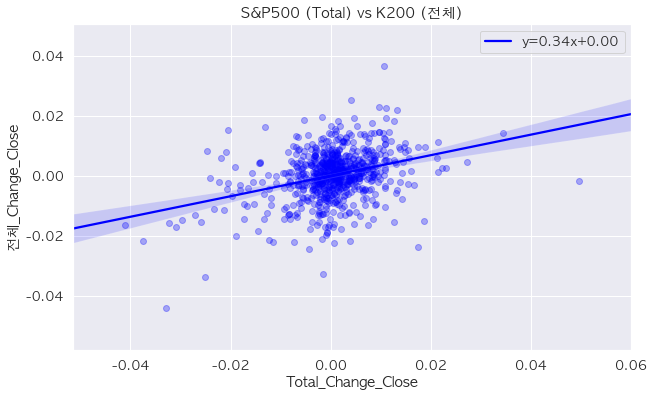

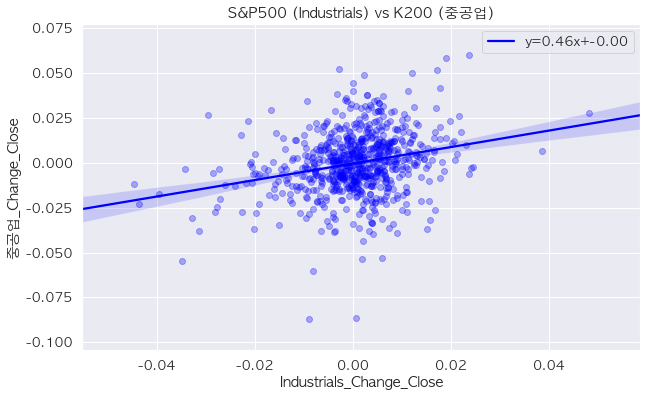

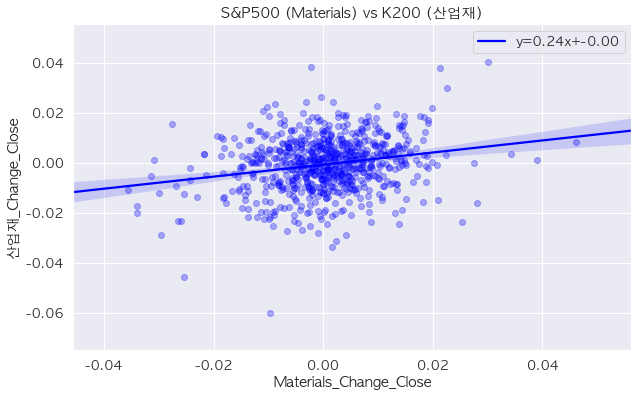

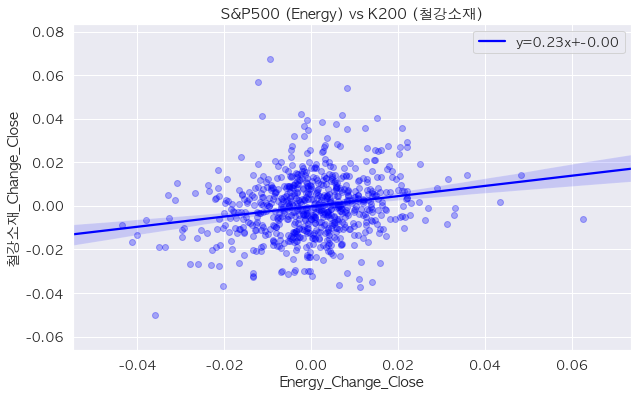

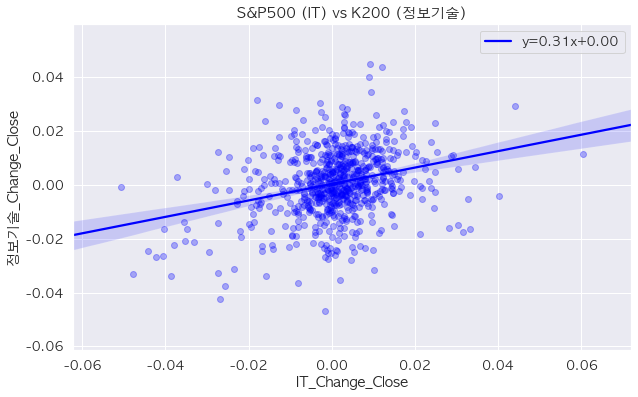

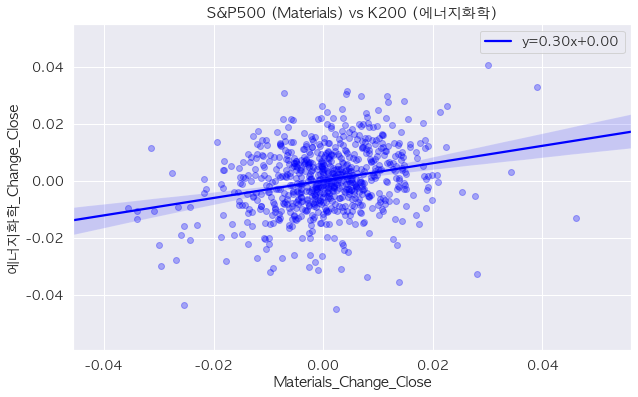

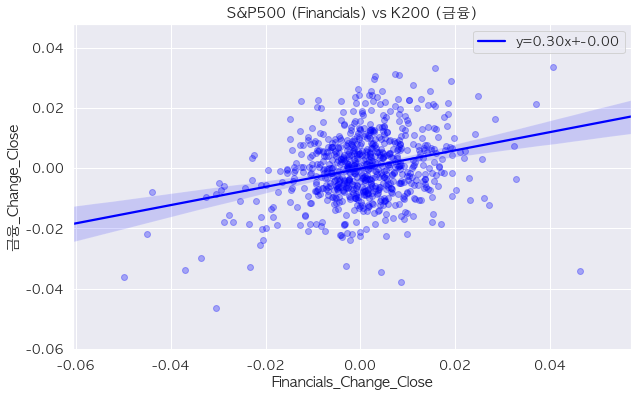

In [16]:
# 상관계수가 높은 조합들 - 종가
reg_and_plot('Total', '전체', target='Close')
reg_and_plot('Industrials', '중공업', target='Close')
reg_and_plot('Materials', '산업재', target='Close')
reg_and_plot('Energy', '철강소재', target='Close')
reg_and_plot('IT', '정보기술', target='Close')
reg_and_plot('Materials', '에너지화학', target='Close')
reg_and_plot('Financials', '금융', target='Close')

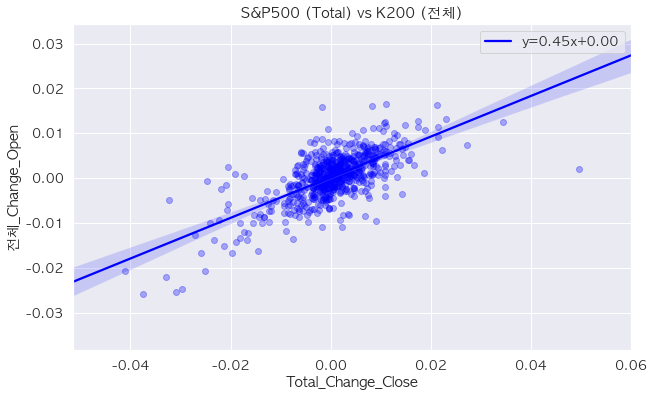

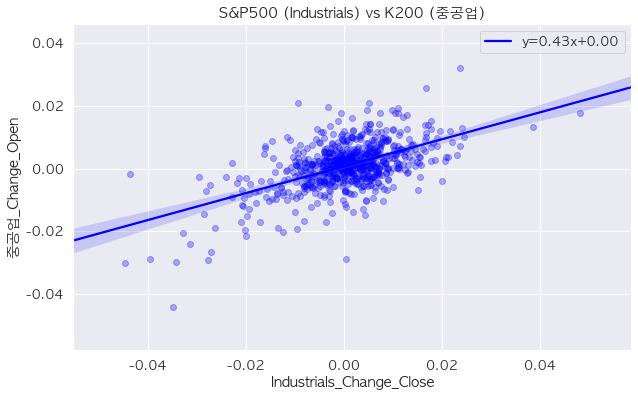

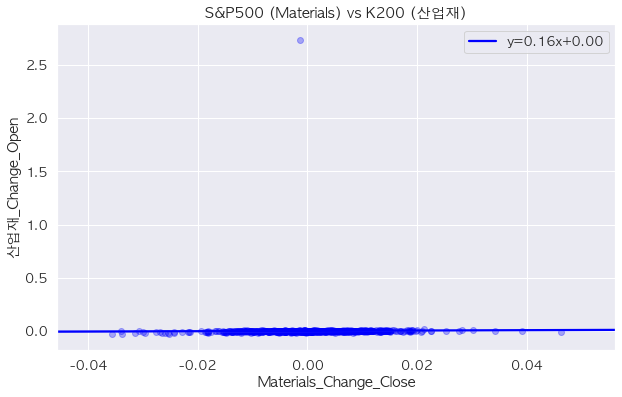

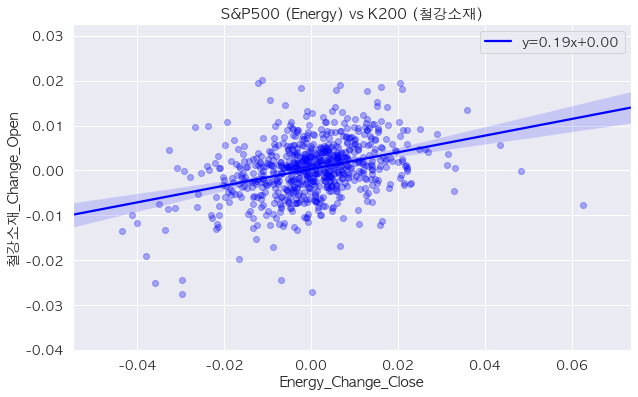

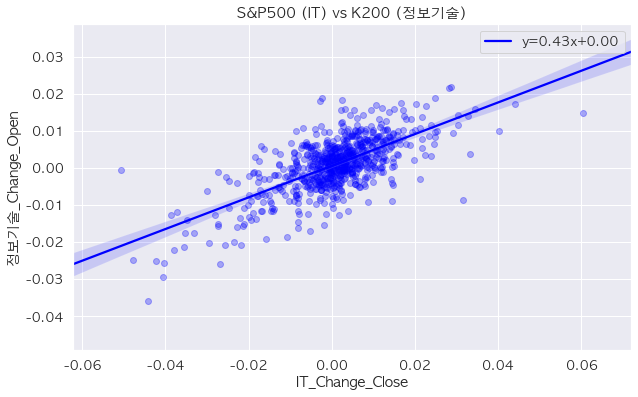

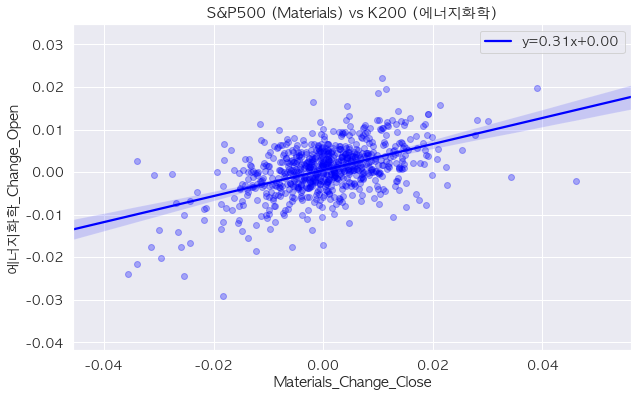

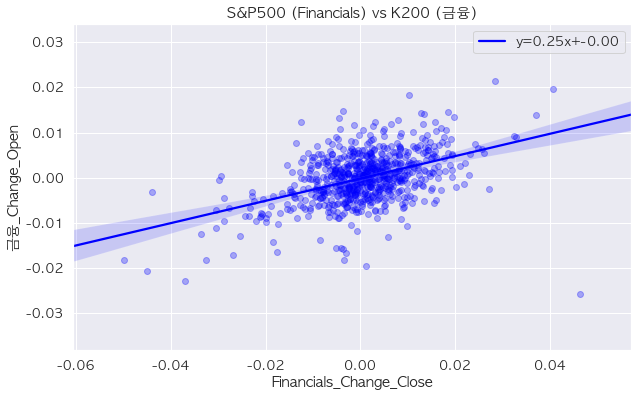

In [17]:
# 상관계수가 높은 조합들 - 시가
reg_and_plot('Total', '전체', target='Open')
reg_and_plot('Industrials', '중공업', target='Open')
reg_and_plot('Materials', '산업재', target='Open')
reg_and_plot('Energy', '철강소재', target='Open')
reg_and_plot('IT', '정보기술', target='Open')
reg_and_plot('Materials', '에너지화학', target='Open')
reg_and_plot('Financials', '금융', target='Open')

In [23]:
# 회귀분석 아웃풋

print_reg_output('Total', '전체')
print_reg_output('Industrials', '중공업')
print_reg_output('Materials', '산업재')
print_reg_output('Energy', '철강소재')
print_reg_output('IT', '정보기술')
print_reg_output('Materials', '에너지화학')
print_reg_output('Financials', '금융')



Total vs 전체
                            OLS Regression Results                            
Dep. Variable:              전체_Change   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     92.93
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           8.47e-21
Time:                        08:59:04   Log-Likelihood:                 2554.6
No. Observations:                 743   AIC:                            -5105.
Df Residuals:                     741   BIC:                            -5096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.824e-05      0.000